In [1]:
import kagglehub
path = kagglehub.dataset_download("techsash/waste-classification-data")
print("This is the path", path)

100%|██████████| 427M/427M [00:11<00:00, 39.1MB/s]

Extracting files...


This is the path /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = '/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN'
test_path = '/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST'


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})


100%|██████████| 12565/12565 [00:05<00:00, 2298.73it/s]


([<matplotlib.patches.Wedge at 0x7dba028ec710>,
 [Text(-1.0824963456092194, -0.1954524539183007, 'Organic'),
  Text(1.0824963273096353, 0.19545255526892205, 'Recyclable')],
 [Text(-0.5904525521504832, -0.10661042940998221, '55.69%'),
  Text(0.590452542168892, 0.10661048469213928, '44.31%')])

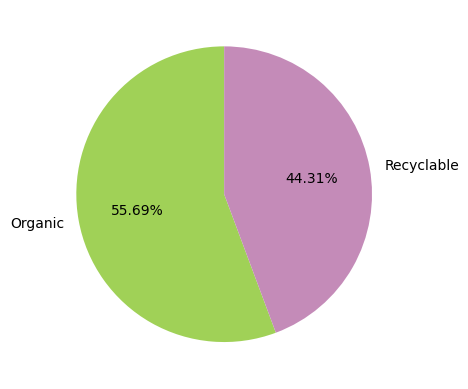

In [6]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90)

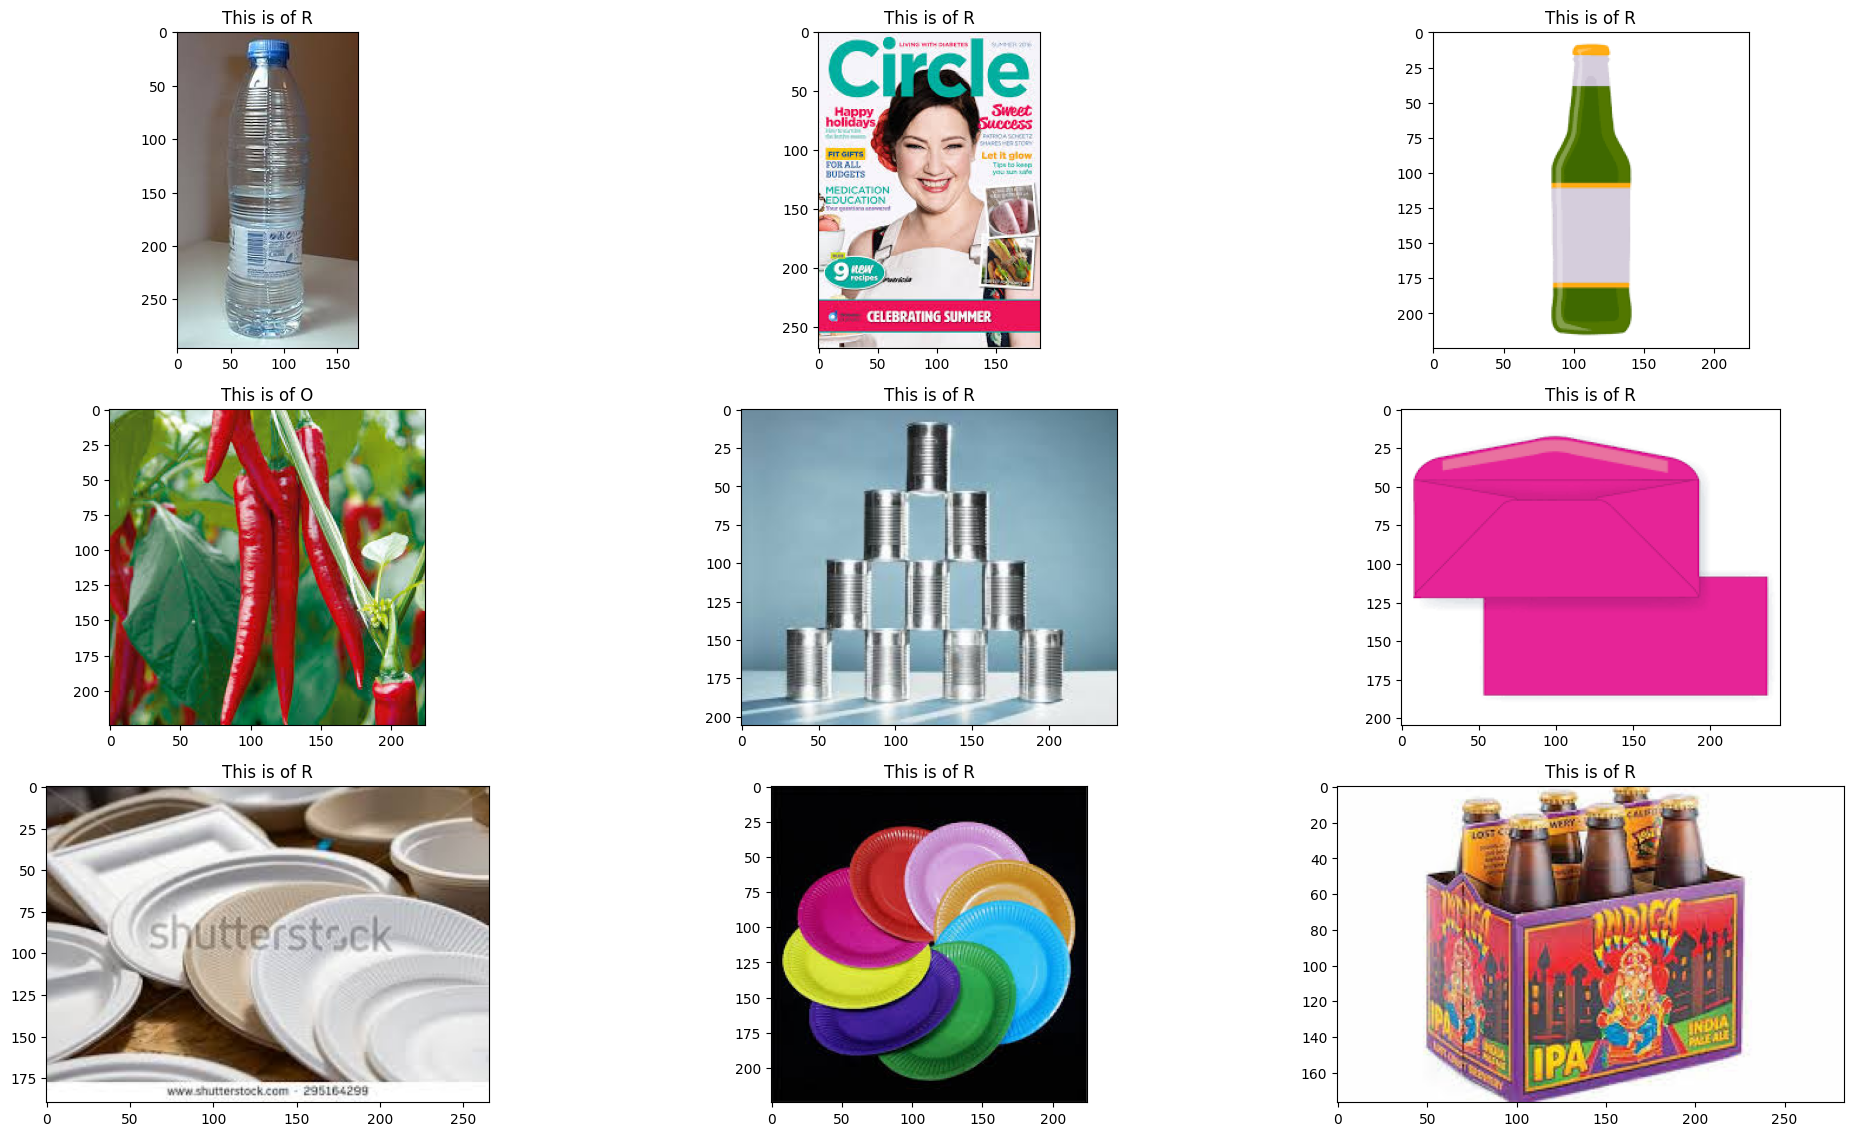

In [7]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [12]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 76s 184ms/step - accuracy: 0.7653 - loss: 0.5284 - val_accuracy: 0.8699 - val_loss: 0.3363
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.8395 - loss: 0.3877 - val_accuracy: 0.8651 - val_loss: 0.3204
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.8531 - loss: 0.3648 - val_accuracy: 0.8699 - val_loss: 0.3144
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.8747 - loss: 0.3166 - val_accuracy: 0.8778 - val_loss: 0.3005
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.8826 - loss: 0.2961 - val_accuracy: 0.9033 - val_loss: 0.2604
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.9013 - loss: 0.2510 - val_accuracy: 0.8571 - val_loss: 0.3916
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.9132 - loss: 0.2189 - val_accuracy: 0.8906 - val_loss: 0.3739
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.9378 - loss: 0

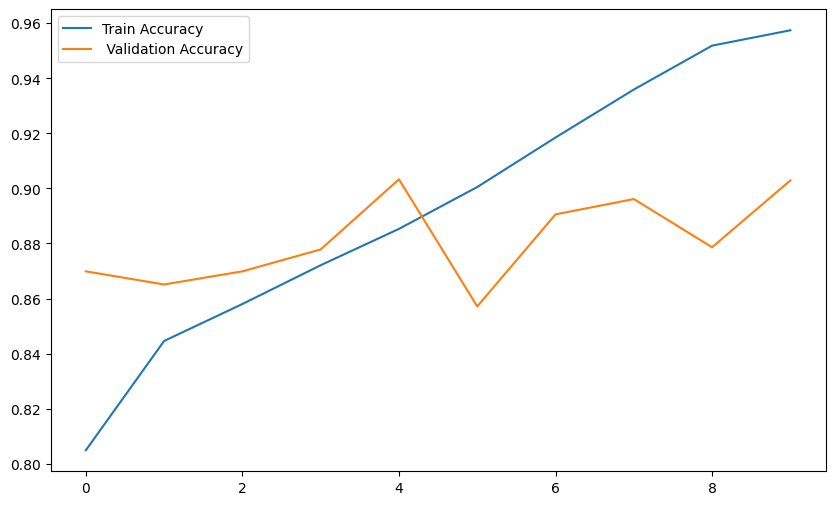

In [13]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

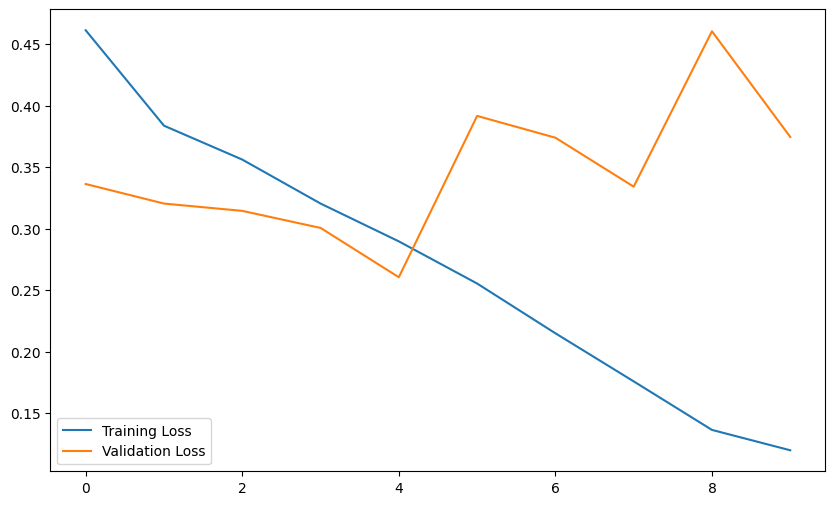

In [14]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [22]:
import cv2
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step
The image shown is Organic Waste


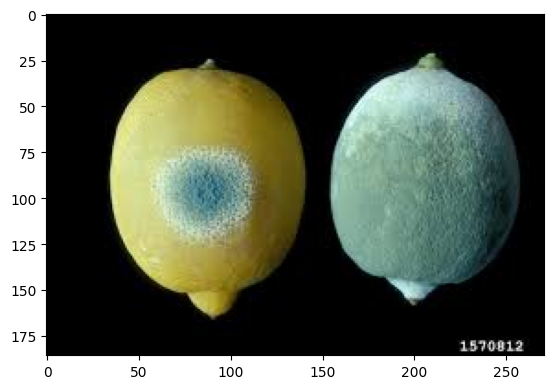

In [25]:
import cv2
def predict_fun(img):
  # Check if image loading was successful
  if img is None:
    print("Error: Image could not be loaded. Check the file path and ensure the image exists.")
    return  # Exit the function if image loading failed

  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

test_img = cv2.imread('./O_10000.jpg')
# Verify if the path is correct and the image exists
if test_img is None:
  print(f"Error: Could not load image")
else:
  predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The image shown is Recyclable Waste


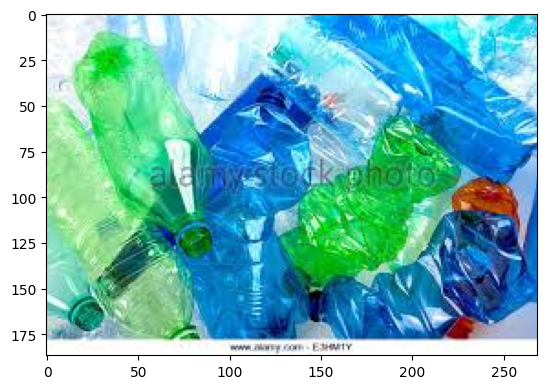

In [26]:
test_img = cv2.imread('./R_100.jpg')
predict_fun(test_img)